In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans

In [111]:
def plot(x, y):
    for i in range(y.size):
        if y[i] == 0:
            plt.scatter(x[i, 0], x[i, 1], c="r")
        elif y[i] == 1:
            plt.scatter(x[i, 0], x[i, 1], c="b")
        elif y[i] == 2:
            plt.scatter(x[i, 0], x[i, 1], c="y")
        elif y[i] == 3:
            plt.scatter(x[i, 0], x[i, 1], c="c")
        elif y[i] == 4:
            plt.scatter(x[i, 0], x[i, 1], c="k")            
        elif y[i] == 5:
            plt.scatter(x[i, 0], x[i, 1], c="m")

In [89]:
def plot2(x, n, n_clusters):
    colors ="rbyckm"
    for i,col in zip(range(1, n_clusters + 1), colors):
        plt.scatter(x[(i-1)*n:n*i, 0], x[(i-1)*n:n*i, 1], s=0.5, c=col)
        

In [119]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [ -2.0, -2.0]]
clusters_std = [ 2.0 , 1.0 ]
X, y = make_blobs (n_samples=[n_samples_1, n_samples_2],
centers = centers,
cluster_std=clusters_std,
random_state=0, shuffle=False)


In [120]:
y.shape

(1100,)

In [91]:
df = pd.DataFrame(np.insert(X, 2, y, axis=1), columns=["X1", "X2", "Y"])
df.tail()

,X1,X2,Y
1095,-2.011136,-0.655926,1.0
1096,-1.499983,-3.431798,1.0
1097,-2.628981,-0.929927,1.0
1098,-2.621083,-0.265428,1.0
1099,-3.098289,-1.427387,1.0


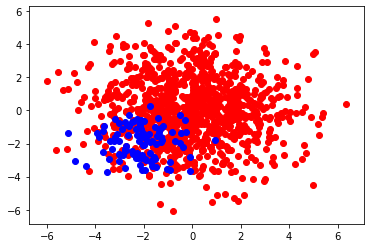

In [92]:
plot(X, y)
plt.show()

In [93]:
kmean = KMeans(n_clusters=2)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

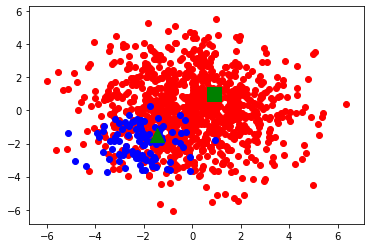

In [94]:
plot(X, y)   
centroids = kmean.cluster_centers_
plt.scatter(centroids[0, 0], centroids[0, 1], s=200, c='g', marker='s')
plt.scatter(centroids[1, 0], centroids[1, 1], s=200, c='g', marker='^')
plt.show()

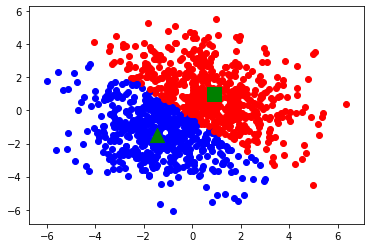

In [95]:
plot(X, kmean.labels_)   
centroids = kmean.cluster_centers_
plt.scatter(centroids[0, 0], centroids[0, 1], s=200, c='g', marker='s')
plt.scatter(centroids[1, 0], centroids[1, 1], s=200, c='g', marker='^')
plt.show()

In [96]:
metrics.adjusted_rand_score(y, kmean.labels_)

0.04505812028448698

In [97]:
labels = kmean.labels_
metrics.calinski_harabasz_score(X, labels)

633.0812630057959

In [98]:
labels = kmean.labels_
metrics.davies_bouldin_score(X, labels)

1.1381760122131444

In [99]:
mini = MiniBatchKMeans(n_clusters=2)
mini.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=2, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

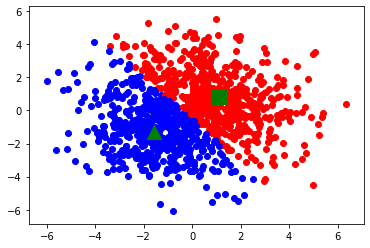

In [100]:
plot(X, mini.labels_)   
centroids = mini.cluster_centers_
plt.scatter(centroids[0, 0], centroids[0, 1], s=200, c='g', marker='s')
plt.scatter(centroids[1, 0], centroids[1, 1], s=200, c='g', marker='^')
plt.show()

In [101]:
metrics.adjusted_rand_score(y, mini.labels_)

0.038133181081771106

In [102]:
labels = mini.labels_
metrics.calinski_harabasz_score(X, labels)

629.3523779615557

In [103]:
labels = mini.labels_
metrics.davies_bouldin_score(X, labels)

1.1416245461833625

In [122]:
np.random.seed(0)
n_points_per_cluster = 30000
C1 = [ -6 , -2] + 0.7 * np.random.randn(n_points_per_cluster, 2)
Y1 = np.full((n_points_per_cluster, 1), 0)
C2 = [ -2 , 2 ] + 0.3 * np.random.randn(n_points_per_cluster, 2)
Y2 = np.full((n_points_per_cluster, 1), 1)
C3 = [ 1 , -2] + 0.2 * np.random.randn(n_points_per_cluster, 2)
Y3 = np.full((n_points_per_cluster, 1), 2)
C4 = [ 4 , -4] + 0.1 * np.random.randn(n_points_per_cluster, 2)
Y4 = np.full((n_points_per_cluster, 1), 3)
C5 = [ 5 , 0 ] + 1.4 * np.random.randn(n_points_per_cluster, 2)
Y5 = np.full((n_points_per_cluster, 1), 4)
C6 = [ 5 , 6 ] + 2.0 * np.random.randn(n_points_per_cluster, 2)
Y6 = np.full((n_points_per_cluster, 1), 5)
X = np.vstack( (C1, C2 , C3 , C4 , C5 , C6 ) )
y = np.vstack( (Y1, Y2, Y3, Y4, Y5, Y6) )


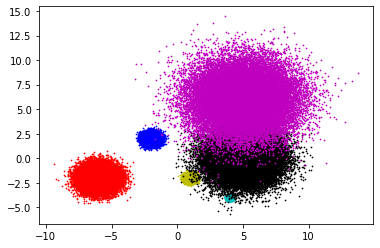

In [105]:
plot2(X, n=n_points_per_cluster, n_clusters=6)
plt.show()

In [106]:
kmean = KMeans(n_clusters=6)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

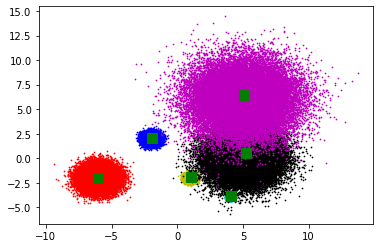

In [107]:
plot2(X, n=n_points_per_cluster, n_clusters=6) 
centroids = kmean.cluster_centers_
plt.scatter(centroids[0, 0], centroids[0, 1], s=100, c='g', marker='s')
plt.scatter(centroids[1, 0], centroids[1, 1], s=100, c='g', marker='s')
plt.scatter(centroids[2, 0], centroids[2, 1], s=100, c='g', marker='s')
plt.scatter(centroids[3, 0], centroids[3, 1], s=100, c='g', marker='s')
plt.scatter(centroids[4, 0], centroids[4, 1], s=100, c='g', marker='s')
plt.scatter(centroids[5, 0], centroids[5, 1], s=100, c='g', marker='s')
plt.show()

In [123]:
metrics.adjusted_rand_score(np.reshape(y, (180000,)), kmean.labels_)

0.9025625709125724

In [124]:
labels = kmean.labels_
metrics.calinski_harabasz_score(X, labels)

523474.72213079216

In [125]:
labels = kmean.labels_
metrics.davies_bouldin_score(X, labels)

0.461257386097708

In [128]:
mini = MiniBatchKMeans(n_clusters=6)
mini.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=6, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

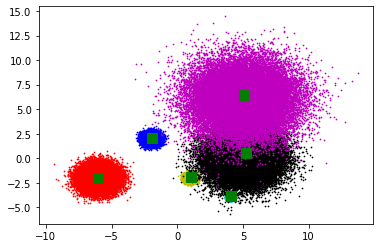

In [129]:
plot2(X, n=n_points_per_cluster, n_clusters=6) 
centroids = kmean.cluster_centers_
plt.scatter(centroids[0, 0], centroids[0, 1], s=100, c='g', marker='s')
plt.scatter(centroids[1, 0], centroids[1, 1], s=100, c='g', marker='s')
plt.scatter(centroids[2, 0], centroids[2, 1], s=100, c='g', marker='s')
plt.scatter(centroids[3, 0], centroids[3, 1], s=100, c='g', marker='s')
plt.scatter(centroids[4, 0], centroids[4, 1], s=100, c='g', marker='s')
plt.scatter(centroids[5, 0], centroids[5, 1], s=100, c='g', marker='s')
plt.show()

In [131]:
metrics.adjusted_rand_score(np.reshape(y, (180000,)), mini.labels_)

0.9059666490952898

In [132]:
labels = mini.labels_
metrics.calinski_harabasz_score(X, labels)

523212.7715906429

In [133]:
labels = mini.labels_
metrics.davies_bouldin_score(X, labels)

0.46007511994791694